In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\Data science\zomato analysis\zomato.csv")


In [2]:
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape



(51717, 17)

In [4]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [5]:
df.isnull().sum().sort_values(ascending=False)

dish_liked                     28078
rate                            7775
phone                           1208
approx_cost(for two people)      346
rest_type                        227
cuisines                          45
location                          21
url                                0
address                            0
votes                              0
name                               0
online_order                       0
book_table                         0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
df.drop(['url','phone','menu_item','reviews_list'], axis=1, inplace=True)


In [7]:
df.rename(columns={
    'approx_cost(for two people)': 'cost',
    'listed_in(type)': 'type',
    'listed_in(city)': 'city'
}, inplace=True)


In [8]:
df.drop_duplicates(inplace=True)


CLEAN RATING COLUMN

In [9]:
df = df[df['rate'] != 'NEW']
df = df[df['rate'] != '-']
df['rate'] = df['rate'].str.split('/').str[0]
df['rate'] = df['rate'].astype(float)


CLEAN COST COLUMN

In [10]:
df['cost'] = df['cost'].str.replace(',', '')
df['cost'] = df['cost'].astype(float)


DATA VISUALIZATION

RESTAURANT DELIVERING ONLINE OR NOT

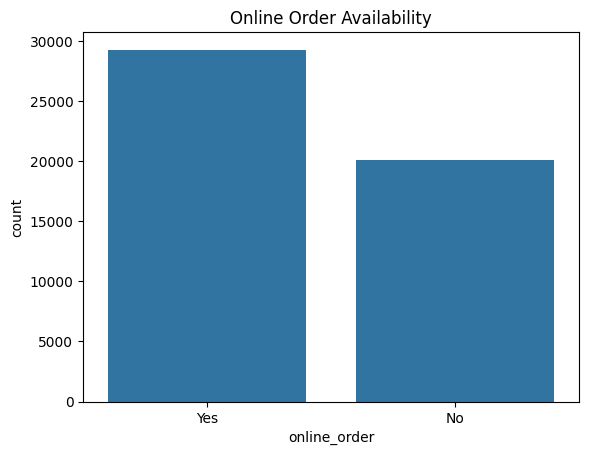

In [11]:
sns.countplot(x='online_order', data=df)
plt.title("Online Order Availability")
plt.show()


RESTAURANT ALLOWING TABLE BOOKING

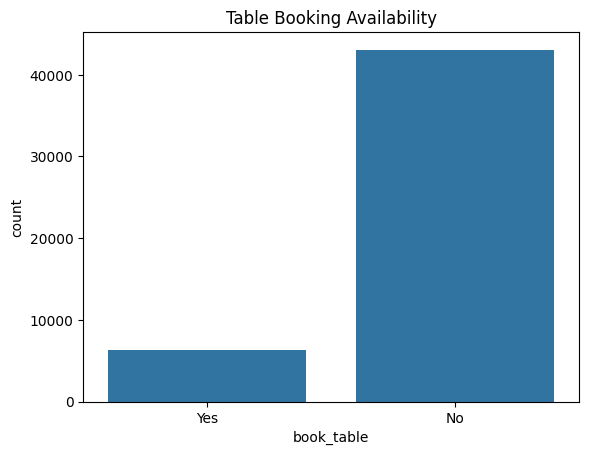

In [12]:
sns.countplot(x='book_table', data=df)
plt.title("Table Booking Availability")
plt.show()


TABLE BOOKING VS RATING

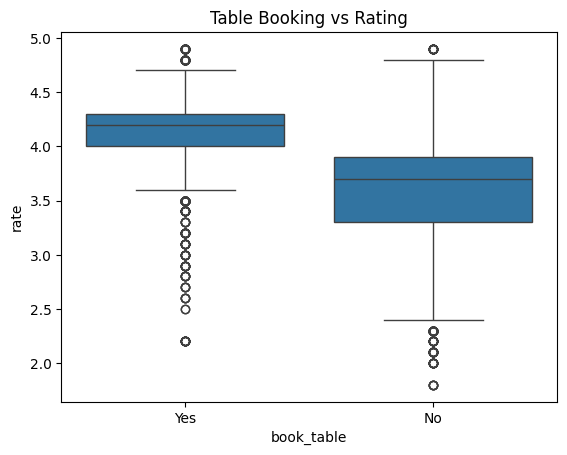

In [13]:
sns.boxplot(x='book_table', y='rate', data=df)
plt.title("Table Booking vs Rating")
plt.show()


TOP LOCATIONS


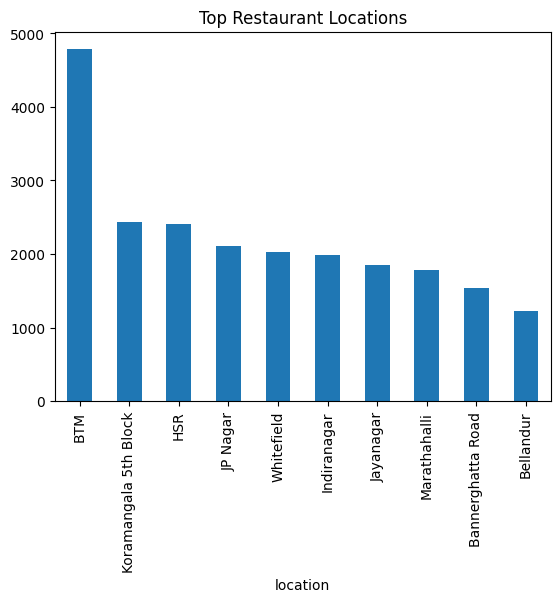

In [14]:
top_locations = df['location'].value_counts().head(10)

top_locations.plot(kind='bar')
plt.title("Top Restaurant Locations")
plt.show()


LOCATION VS RATING

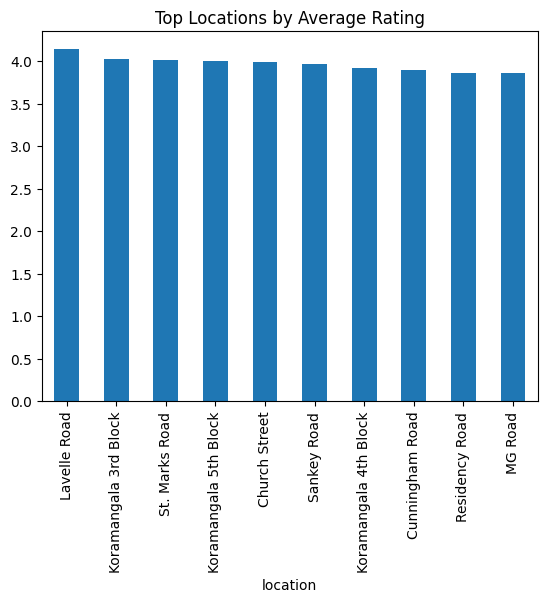

In [15]:
location_rate = df.groupby('location')['rate'].mean().sort_values(ascending=False).head(10)

location_rate.plot(kind='bar')
plt.title("Top Locations by Average Rating")
plt.show()


RESTAURANT TYPE DISTRIBUTION

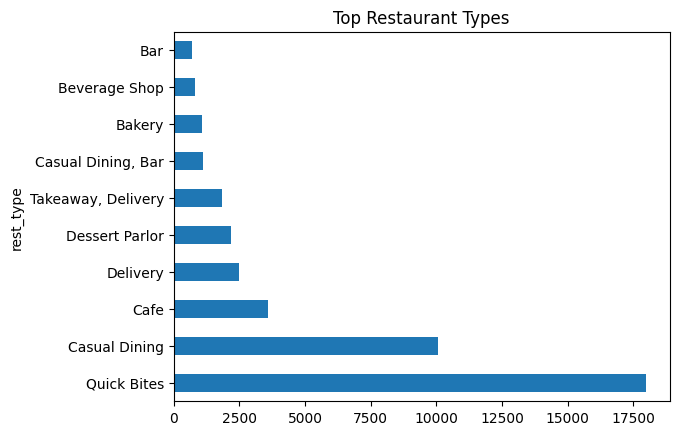

In [16]:
df['rest_type'].value_counts().head(10).plot(kind='barh')
plt.title("Top Restaurant Types")
plt.show()


Gaussian Distribution: Restaurant Type vs Rating

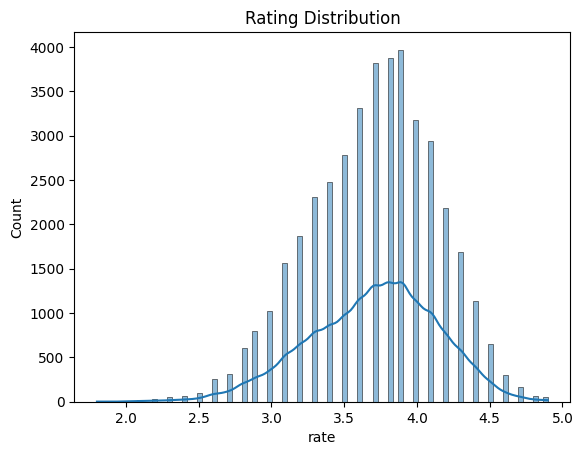

In [17]:
sns.histplot(df['rate'], kde=True)
plt.title("Rating Distribution")
plt.show()


TYPE OF SERVICES


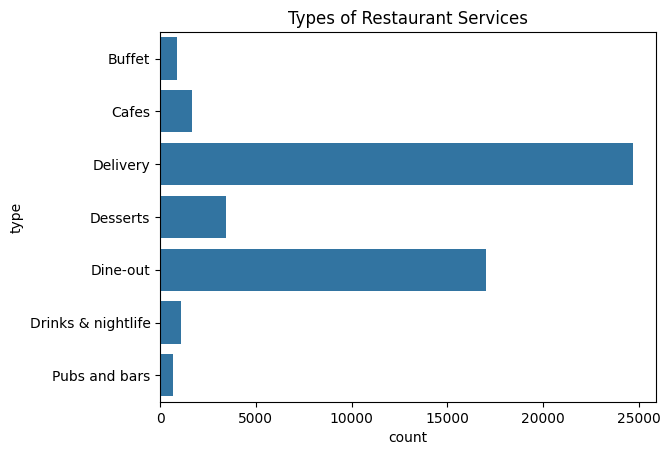

In [18]:
sns.countplot(y='type', data=df)
plt.title("Types of Restaurant Services")
plt.show()


RELATION BETWEEN TYPE AND RATING

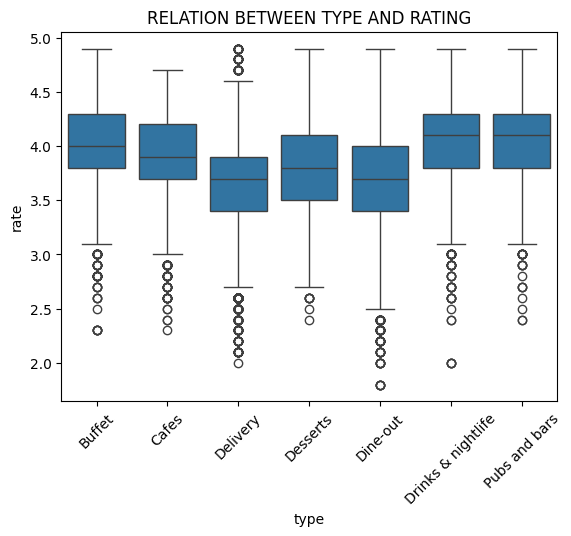

In [25]:
sns.boxplot(x='type', y='rate', data=df)
plt.xticks(rotation=45)
plt.title("RELATION BETWEEN TYPE AND RATING")
plt.show()


COST DISTRIBUTION FOR 2 PEOPLE


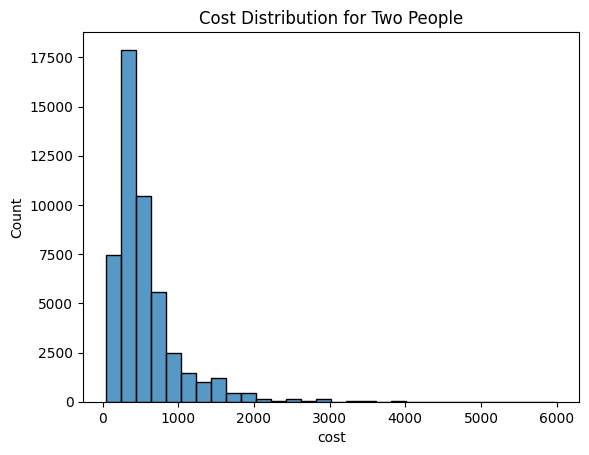

In [26]:
sns.histplot(df['cost'], bins=30)
plt.title("Cost Distribution for Two People")
plt.show()


NUMBER OF RESTAURANT IN EACH LOCATION

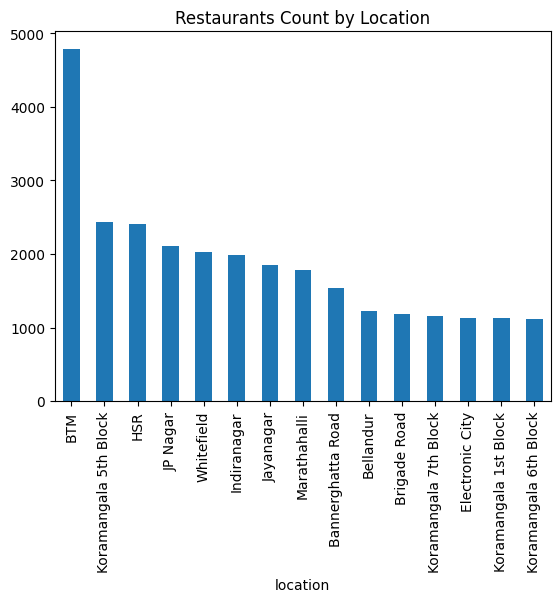

In [27]:
df['location'].value_counts().head(15).plot(kind='bar')
plt.title("Restaurants Count by Location")
plt.show()


MOST FAMOUS RESTAURANT CHAINS

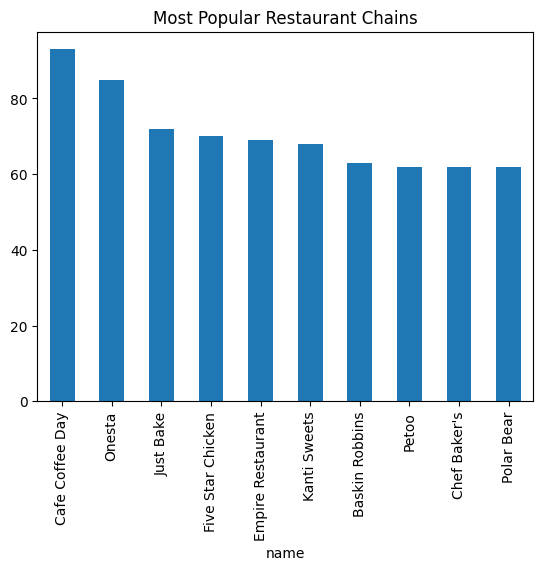

In [28]:
df['name'].value_counts().head(10).plot(kind='bar')
plt.title("Most Popular Restaurant Chains")
plt.show()


INFERENCES


🔍 Key Learnings

* Online ordering is widely adopted
* Table booking restaurants tend to have higher ratings
* Certain locations dominate restaurant density
* Cost does not always correlate with rating
* Casual Dining & Quick Bites are most common
* Few restaurant chains dominate customer preference

8️⃣ Business Problems This Dataset Can Solve

✅ Best locations to open a new restaurant
✅ Ideal pricing strategy
✅ Whether to enable online delivery
✅ Which restaurant type is most profitable
✅ Customer preference analysis
✅ Competitive analysis for Swiggy/Zomato


